# Прикладная статистика. ДЗ 2.
# Академия Аналитиков Авито

__Правила:__
- Жесткий дедлайн: **2022-12-31 23:59**. 
- Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW2-<ваше имя> через бота @AAA_stats23_bot
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

## Задача 1 (1 балл)

### На зачет

Пусть $x_1, ... x_N$ — реализация выборки $\xi_1, ... \xi_N \sim \mathcal{N}(\mu,\sigma)$. Мы хотим проверить гипотезу:
- $H_0: \mu = \mu_0$
- $H_1: \mu \neq \mu_0$

Реализовать критерий Стьюдента — функцию `simple_my_t_test(sample, mu_0, alpha)`. Функция должна вернуть `SimpleMyTtestResults` с полями
- is_rejected: отверглась или нет гипотеза H_0 на уровне значимости alpha
- pvalue

Какие библиотеки можно использовать:

```
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t
```

In [1]:
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t

**Важно:** что ее решение надо объяснить! Можно не вдаваться в детали, но ваш алгоритм надо описать текстом.

- Статистика $T(X) = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}}$  
Считаю статистику: `T_statistics = np.sqrt(n) * (np.mean(sample) - mu_0) / np.std(sample, ddof=1)`  
  
  
- $T(X)  \sim t_{n - 1}$
- Двусторонний критерий: $\left\{T(X) \geq t_{n-1, 1 - \frac{\alpha}{2}} \right\} \bigcup \left\{T(X) \leq -t_{n-1, 1 - \frac{\alpha}{2}} \right\} $
    - p-value = $2\cdot \min \left[{\tau_{n-1}(z), 1 - \tau_{n-1}(z)} \right]$, где z &mdash; реализация статистики $T(X)$  
Считаю $\tau_{n-1}(z)$: `tau = t(n - 1).cdf(T_statistics)`  
Считаю p-value: ` 2 * min(tau, 1 - tau)`
- Отклоняем H_0 в пользу H_1, если p-value < alpha, в противном случае принимаем H_0  
Считаю is_rejected: `pvalue < alpha`

In [2]:
# Автопроверка

MySimpleTtestResults = namedtuple('MySimpleTtestResults', 
                                  ['is_rejected', 'pvalue'])

def my_simple_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MySimpleTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
        - pvalue: float
    """

    is_rejected = None
    pvalue = None
    
    n = len(sample)
    
    T_statistics = np.sqrt(n) * (np.mean(sample) - mu_0) / np.std(sample, ddof=1)
    
    tau = t(n - 1).cdf(T_statistics)
    
    pvalue = 2 * min(tau, 1 - tau)
    is_rejected = pvalue < alpha

    return MySimpleTtestResults(is_rejected, pvalue)


In [3]:
from scipy.stats import norm, ttest_1samp

sample_dist = norm(loc=2, scale=3)
mu0=sample_dist.expect()

sample = sample_dist.rvs(10)

my_simple_t_test(sample, 0.1).pvalue, ttest_1samp(sample, 0.1).pvalue

(0.028207273559264445, 0.028207273559264348)

## Задача 2 (4 балла)

Решить прошлую задачу без использования распределения Стьюдента,
**пользуясь следующими библиотеками**

```
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos
``` 

Так как нельзя использовать распределение Стьюдента, попробую получить его эмпирически, а именно:
   - Сгенерирую нормальное распределение выборки размером n из равномерного распределения. Для это воспользуюсь [преобразованием Бокса_—_Мюллера](https://ru.wikipedia.org/wiki/Преобразование_Бокса_—_Мюллера). Из него имею выборку $X_1, X_2, \dots X_N \sim \mathcal{N}(0, 1)$
   - Далее гененрирую такие выборки m раз и для каждой выборки считаю статистику $\sqrt{n}\dfrac{\overline X - 0}{\sqrt{S^2}}$, которая в теории должна быть распределена по Стьюденту $t_{N - 1}$. $\Rightarrow$ получилось m статистик  $T_{emp_1}, T_{emp_2}, \dots T_{emp_M} \sim t_{N - 1}$
   - Считаю нашу статистику ($T_{samp}$) для sample и : $P(T_{samp} < T) \approx P(T_{sam} < T_{emp_1}, T_{samp} < T_{emp_2}, \dots T_{samp} < T_{emp_M}) = \frac{\underset{i=1}{\overset{M}{\sum}} I[T_{samp} < T_{emp_i}]}{|T_{emp}|}$
   - Дальше как в 1 задаче

In [4]:
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand # равномерное распределение на [0,1)
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos

In [5]:
from tqdm import tqdm

In [6]:
def gen_matrix_from_box_muller_transform(m: int, n: int) -> np.ndarray:
    bm_matrix = np.empty(shape=(m, n))
    
    r = rand(m // 2 + 1, n)
    phi = rand(m // 2 + 1, n)
    
    z_0 = cos(2*pi*phi) * (-2*log(r))**0.5
    z_1 = sin(2*pi*phi) * (-2*log(r))**0.5
    
    bm_matrix[:m // 2, :] = z_0[:-1, :]
    bm_matrix[m // 2:2 * (m // 2), :] = z_1[:-1, :]
    if m % 2:
        bm_matrix[-1, :] = z_1[-1, :]
    
    return bm_matrix

In [7]:
def get_statistics_from_bm_matrix(bm_matrix: np.ndarray) -> np.ndarray:
    mean_ = mean(bm_matrix, axis=1)
    sem = std(bm_matrix, axis=1, ddof=1) / (bm_matrix.shape[1])**0.5
    sampling_statistics = mean_ / sem
    return sampling_statistics

In [8]:
def get_tau(m:int, n:int, T_statistics, num_repeats: int = 100):
    tau = 0
    for i in tqdm(range(num_repeats)):
        bm_matrix = gen_matrix_from_box_muller_transform(m, n)
        sampling_statistics = get_statistics_from_bm_matrix(bm_matrix)
        
        tau += (sampling_statistics >= T_statistics).sum()
        
    tau /= (m * num_repeats)
        
    return tau

In [9]:
bm_matrix = gen_matrix_from_box_muller_transform(1000_000, 10)
sampling_statistics = get_statistics_from_bm_matrix(bm_matrix)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


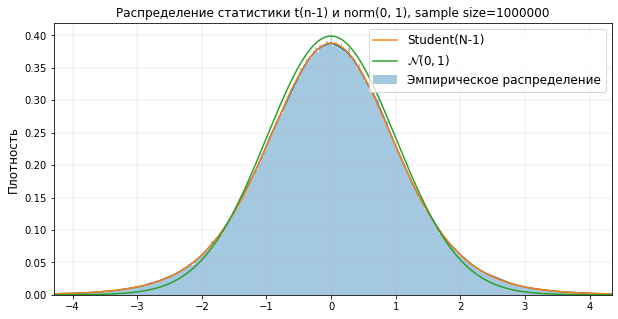

In [10]:
import matplotlib.pyplot as plt
from seaborn import distplot

plt.figure(figsize=(10, 5))
l_bound, r_bound = np.quantile(sampling_statistics, [0.001, 0.999])


x = np.linspace(l_bound, r_bound, 1000)
plt.title(f'Распределение статистики t(n-1) и norm(0, 1), sample size={1000_000}', fontsize=12)
distplot(sampling_statistics, label='Эмпирическое распределение', bins=1000)
plt.plot(x, t(9).pdf(x), label='Student(N-1)')
plt.plot(x, norm(0, 1).pdf(x), label='$\mathcal{N}(0, 1)$')
plt.legend(fontsize=12)
plt.xlim((l_bound, r_bound))
plt.ylabel('Плотность', fontsize=12)
plt.grid(linewidth=0.2)
plt.show()

In [11]:
# Автопроверка

MyTtestResults = namedtuple('MyTtestResults', ['is_rejected', 'pvalue'])

def my_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MyTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
    """

    is_rejected = None
    pvalue = None
    
    n = len(sample)
    m = int(1_000_000 / n)
    num_repeats = 400
    
    T_statistics = (n**0.5) * (mean(sample) - mu_0) / std(sample, ddof=1)
    
    tau = get_tau(m, n, T_statistics, num_repeats)
    
    pvalue = 2 * min(tau, 1 - tau)
    is_rejected = pvalue < alpha

    return MyTtestResults(is_rejected, pvalue)

In [12]:
sample_dist = norm(loc=2, scale=3)
mu0=sample_dist.expect()

sample = sample_dist.rvs(100)

In [13]:
my_pvalue = my_t_test(sample, 1.9).pvalue, 
bib_pvalue = ttest_1samp(sample, 1.9).pvalue

100%|██████████| 400/400 [00:22<00:00, 17.61it/s]


In [14]:
my_pvalue, bib_pvalue, np.abs((bib_pvalue - my_pvalue))

((0.38191700000000006,), 0.38235655906949817, array([0.00043956]))

- Для получения полного балла, p-value вашего критерия не должно отличаться от p-value `scipy.stats.ttest_1samp` больше, чем на 10^-3.
- Если ваш код для одного теста работает больше минуты - он не засчитывается.

## Задача 3 (4 балла)

### На зачет

**1. (0.5 баллов)**

Написать код для проверки критерия при корректности $H_0$:

- Зафиксировать $\mu = 0,\ \mu_0 = 0$ ($H_0$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок первого рода (False Positive Rate)
- Проверить, стат значимо или нет на уровне 5% отличается полученный процент ошибок от теоретического $\alpha$.


**2. (1.5 балла)**

Провести эксперимент 1 с разными параметрами $n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

--- 
**3. (0.5 баллов)**

Написать код для проверки критерия при корректности $H_1$:

- Зафиксировать $\mu \neq 0,\ \mu_0 = 0$ ($H_1$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок второго рода (False Negative Rate)
- Построить доверительный интервал для мощности критерия при заданном $\mu$.

**2. (1.5 балла)**

Провести предыдущий эксперимент с разными параметрами $\mu, n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

In [15]:
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import product
from tqdm import tqdm

#### 1.

In [16]:
def check_criterion(test_dist, sample_size, mu_0, N_exps=10000, alpha = 0.05):
    np.random.seed(40)
    
    bad_cnt = 0
    for i in range(N_exps):
        sample = test_dist.rvs(sample_size)
        
        pvalue = my_simple_t_test(sample, mu_0, alpha).pvalue
#         pvalue = ttest_1samp(sample, mu_0).pvalue
        
        bad_cnt += (pvalue < alpha)
        
    return proportion_confint(count = bad_cnt, nobs = N_exps, alpha=0.05, method='wilson')

In [17]:
n, sigma, alpha = 1000, 1, 0.05

test_dist = norm(loc=0, scale=sigma)
 
check_criterion(test_dist=test_dist, sample_size=n, mu_0=0, N_exps=10000, alpha=alpha)

(0.04791383183117402, 0.05663015390927806)

#### 2.

In [18]:
GridSearchResultsAlpha = namedtuple('GridSearchResults', ['sample_size', 'scale', 'alpha', 'alpha_CI'])

GridSearchResultsBetta = namedtuple('GridSearchResults', ['sample_size', 'scale', 'alpha', 'mu', 'mu_CI'])

def make_gridsearch(check_criterion: check_criterion,
                    params_grid: dict):
    
    grid_search_results = []
    
    for sample_size, scale, alpha, mu in tqdm(product(*params_grid.values())):
        test_dist = norm(loc=mu, scale=scale)
        
        alpha_ci = check_criterion(test_dist, sample_size, mu_0=0, alpha=alpha)
        
        if len(params_grid['mu']) == 1:
            grid_search_result = GridSearchResultsAlpha(sample_size, scale, alpha, alpha_ci)
        else:
            grid_search_result = GridSearchResultsBetta(sample_size, scale, alpha, mu, alpha_ci)
        
        grid_search_results.append(grid_search_result)
        
    return grid_search_results

In [19]:
params_grid  = {
    'sample_size': [10, 100, 1000],
    'scale': [0.1, 1, 10, 100],
    'alpha': [0.01, 0.05, 0.1],
    'mu': [0]
}

In [20]:
grid_search_results = make_gridsearch(check_criterion=check_criterion, params_grid=params_grid)

36it [05:25,  9.05s/it]


In [22]:
graph_helper = defaultdict()
for result in grid_search_results:
    graph_helper[(result.sample_size, result.alpha)]= result.alpha_CI

Text(0.5, 1.0, 'CI_length / alpha from the number of samples and alpha')

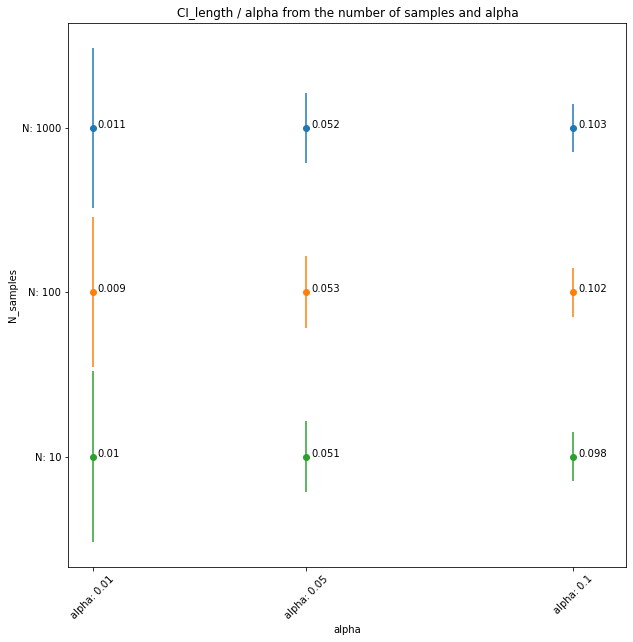

In [23]:
x = [0.01, 0.05, 0.1]

error = [(value[1] - value[0]) / 2 / key[1]  for key, value in graph_helper.items()]
alpha_eval = [(value[1] + value[0]) / 2 for key, value in graph_helper.items()]

y_labels = ['N: ' + n for n in ['10', '100', '1000']]
x_labels = ['alpha: ' + alpha for alpha in ['0.01', '0.05', '0.1']]

fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10, 10))

ax.errorbar(x, [0.4] * len(x), yerr=error[:3], fmt='o')
ax.errorbar(x, [0] * len(x), yerr=error[3:6], fmt='o')
ax.errorbar(x, [-0.4] * len(x), yerr=error[6:], fmt='o')

for j, y_i in enumerate([-0.4, 0, 0.4]):
    for i, x_i in enumerate([0.01, 0.05, 0.1]):
        ax.text(x_i+0.001, y_i, round(alpha_eval[j*3 + i], 3))

ax.set_xticks([0.01, 0.05, 0.1])
ax.set_yticks([-0.4, 0, 0.4])

ax.set_xlim(right=0.11)

ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticklabels(y_labels)

ax.set_ylabel('N_samples')
ax.set_xlabel('alpha')

ax.set_title('CI_length / alpha from the number of samples and alpha')

**Вывод:** От величины sigma FPR не зависит, так как распределение Стьюдента одинаково для разных sigm, от количества N FPR также не зависит, так как, если критерий верный, то вероятность ложного принятия гипотезы(FPR) должна быть равна alpha. Величина доверительного интервала для оценки alpha, то есть для FPR, не зависит от sigma, не зависит от N, но зависит от alpha, так как чем больше alpha, больше гипотез отвергнется, а следовательно, меньше относительный доверительный интервал FPR (CI_length / alpha)

#### 3.

In [24]:
n, sigma, alpha = 1000, 1, 0.05

test_dist = norm(loc=0.09, scale=sigma)
 
check_criterion(test_dist=test_dist, sample_size=n, mu_0=0, N_exps=10000, alpha=alpha)

(0.8038168118785356, 0.8191438803368587)

#### 4.

In [26]:
params_grid  = {
    'sample_size': [10, 100, 1000],
    'scale': [0.1, 1, 10],
    'alpha': [0.01, 0.05, 0.1],
    'mu': [0.05, 0.09, 0.15]
}

In [27]:
grid_search_results = make_gridsearch(check_criterion=check_criterion, params_grid=params_grid)

81it [11:46,  8.72s/it]


In [28]:
def get_dict_dependence(name: str, grid_search_results: dict):
    all_ = {'sample_size': 0, 'scale': 1, 'alpha': 2, 'mu': 3, 'alpha_CI': 4}
    ind_escape = all_[name]
    
    name_dep = defaultdict(list)
    for result in grid_search_results:
        key = []
        for i, value in enumerate(result):
            if i != ind_escape and i != 4:
                key.append(value)
                
        name_dep[tuple(key)].append((result[ind_escape], result[4]))
        
    return name_dep

In [29]:
alpha_dep = get_dict_dependence('alpha', grid_search_results)

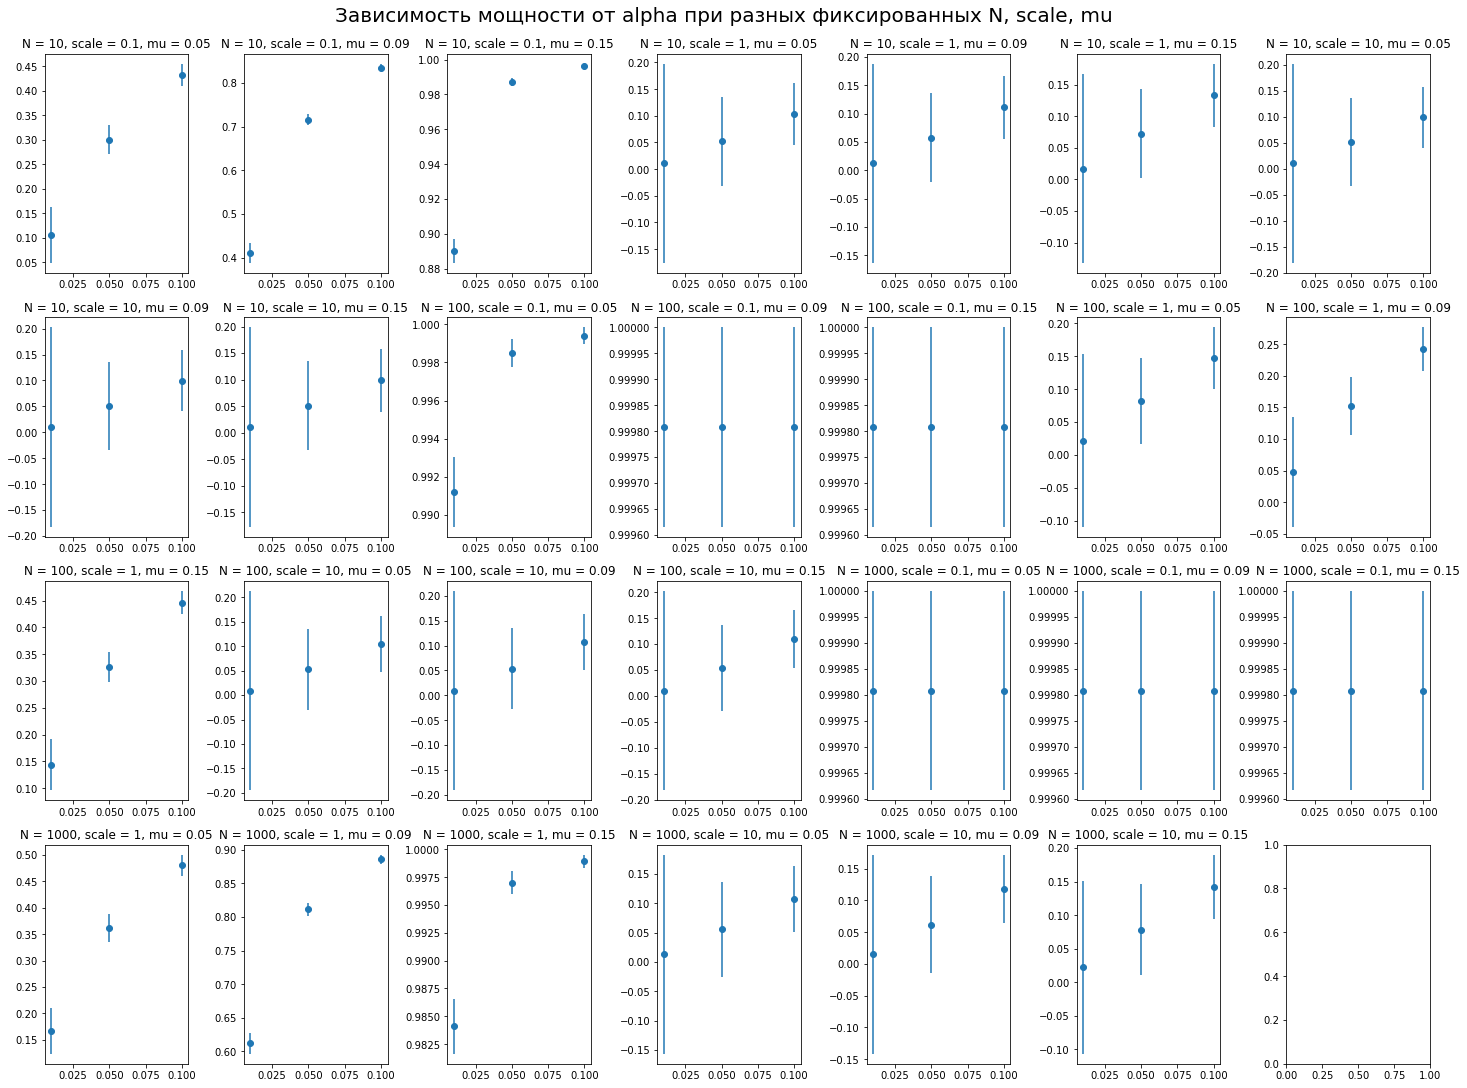

In [30]:
fig, axs = plt.subplots(4, 7, figsize=(20, 15), constrained_layout=True)

for i, (key, value) in enumerate(alpha_dep.items()):
    x = [first for first, _ in value]
    ci = [second for _, second in value]
    y = np.array([(s + f) / 2 for f, s in ci])
    yerr = np.array([(s - f)/2 for f, s in ci]) / y
    
    ind_row, ind_col = i // 7, i % 7
    axs[ind_row, ind_col].errorbar(x, y, yerr=yerr, fmt='o')
    axs[ind_row, ind_col].set_title(f'N = {key[0]}, scale = {key[1]}, mu = {key[2]}')
    
fig.suptitle('Зависимость мощности от alpha при разных фиксированных N, scale, mu', fontsize=20) 
pass

**Вывод**: Чем больше alpha, тем больше мощность, что нормально, так как по сути мы считаем площадь под alpha, и она становится больше

In [31]:
mu_dep = get_dict_dependence('mu', grid_search_results)

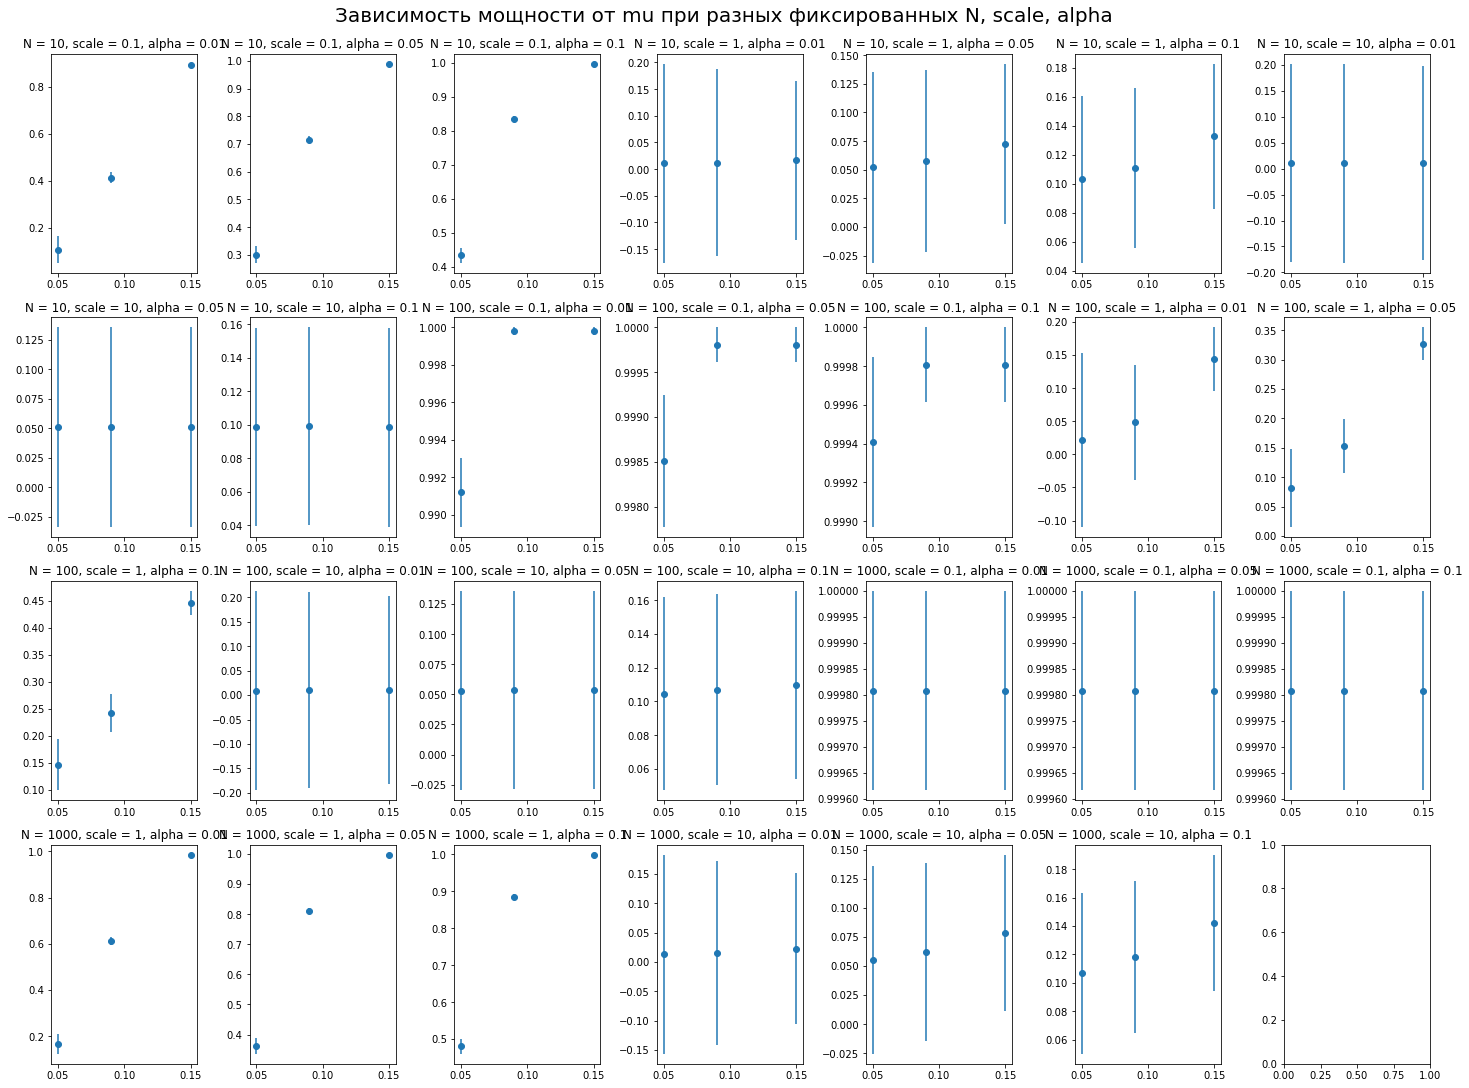

In [32]:
fig, axs = plt.subplots(4, 7, figsize=(20, 15), constrained_layout=True)
                
for i, (key, value) in enumerate(mu_dep.items()):
    x = [first for first, _ in value]
    ci = [second for _, second in value]
    y = np.array([(s + f) / 2 for f, s in ci])
    yerr = np.array([(s - f)/2 for f, s in ci]) / y
    
    ind_row, ind_col = i // 7, i % 7
    axs[ind_row, ind_col].errorbar(x, y, yerr=yerr, fmt='o')
    axs[ind_row, ind_col].set_title(f'N = {key[0]}, scale = {key[1]}, alpha = {key[2]}')
    
fig.suptitle('Зависимость мощности от mu при разных фиксированных N, scale, alpha', fontsize=20) 
pass

**Вывод**: Чем больше $\mu - \mu_0$, тем больше мощность, что тоже нормально, так как чем больше отклонение от истинного, тем больше больше мы уходим в хвост распределения для $\mu_0$ основной частью распределения $\mu$, и тем больше площадь под фиксированным уровнем значимости alpha

In [33]:
scale_dep = get_dict_dependence('scale', grid_search_results)

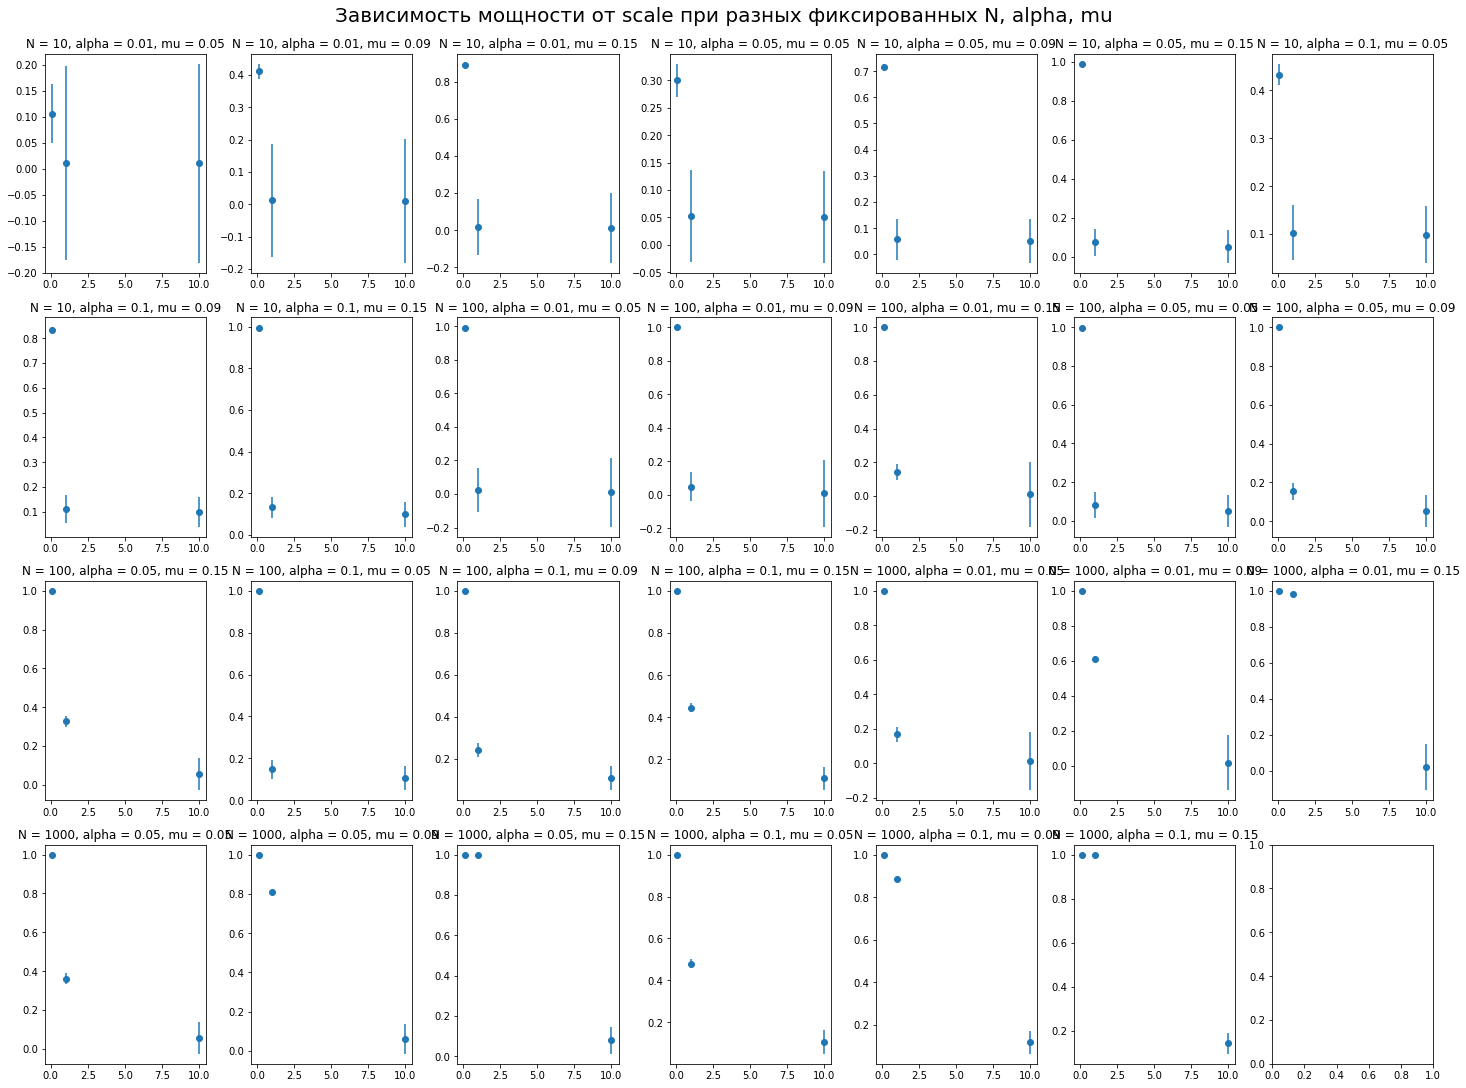

In [34]:
fig, axs = plt.subplots(4, 7, figsize=(20, 15), constrained_layout=True)
                
for i, (key, value) in enumerate(scale_dep.items()):
    x = [first for first, _ in value]
    ci = [second for _, second in value]
    y = np.array([(s + f) / 2 for f, s in ci])
    yerr = np.array([(s - f)/2 for f, s in ci]) / y
    
    ind_row, ind_col = i // 7, i % 7
    axs[ind_row, ind_col].errorbar(x, y, yerr=yerr, fmt='o')
    axs[ind_row, ind_col].set_title(f'N = {key[0]}, alpha = {key[1]}, mu = {key[2]}')
    
fig.suptitle('Зависимость мощности от scale при разных фиксированных N, alpha, mu', fontsize=20) 
pass

**Вывод**: Чем больше sigma, тем  меньше мощность, это происходит из за того, что распределение "размазывается" и при фикс. уровне значимости alpha критическое значение статистики смещается от центра сильнее, и при фикс. $\mu_0$ и $\mu$ площадь распределения $\mu$ под аlpha у $mu_0$ становится меньше

## Задача 4 (2 балла)

### На зачет

Петя скачал себе новую игру себе на телефон. Чтобы начать в нее играть, она должна загрузиться от 0% до 100%, где каждый процент игры загружается независимо ни от чего, и время загрузки каждого процента подчиняется экспоненциальному распределению со средним в 2 сек. Но вот незадача: через 3 минуты Пете надо бежать на автобус к бабушке в деревню, а в дороге Петя хочет уже поиграть( Но игра может скачаться только при подключенном домашнем WI-FI, то есть только только в течение этих 3 минут. С какой вероятностью игра успеет загрузиться и Петя сможет поиграть в дороге? В ответе можно использовать следующие функции распределения:

- Экспоненциальное
- Нормальное
- Равномерное



In [35]:
## не начинал, могу доделать потом по правилам курса

## Задача 5 (3 балла)

### На зачет

Пусть есть равные группы A и B. По результатам теста выручка от одного пользователя в среднем в условиях A оценивается Стьдентом как 50 ± 3 руб, а в условиях B как 56 ± 4 руб. Аналитик, увидев такие результаты, говорит, что эффект составил 6 ± 7 руб, а значит результат AB-теста не стат. значим. Все ли корректно в этих рассуждениях? Любой ответ должен быть аргументирован. В случае, еcли в рассуждениях есть ошибка, то надо также посчитать корректно доверительный интервал.


Для оценки Стьюдентом, средние должны иметь распределение по нормальному закону, тогда пусть $\overline A \sim \mathcal{N}(\mu_a, \dfrac{\sigma^2_a}{N})$, $\overline B \sim \mathcal{N}(\mu_b, \dfrac{\sigma^2_b}{N})$ и из свойства нормального распределения $\overline B - \overline A \sim \mathcal{N}\left(\mu_a - \mu_b, \dfrac{\sigma^2_b}{N} + \dfrac{\sigma^2_a}{N}\right)$  

Доверительные интервалы для двух тестов соответсвенно:

- $CI_{a} = \left(\overline A \pm \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2_a}}{\sqrt{N}} \right) \overset{N > 60}{\approx} \; \overline A \pm z_{1-\alpha/2}\sqrt{\dfrac{S^2_a}{N}} = 50 \pm 3$
- $CI_{b} = \left(\overline B \pm \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2_b}}{\sqrt{N}} \right) \overset{N > 60}{\approx} \; \overline B \pm z_{1-\alpha/2}\sqrt{\dfrac{S^2_b}{N}} = 56 \pm 4$  
Здесь при N > 60 воспользовался свойством распределения Стьюдента ( $t(N-1) \rightarrow \mathcal{N}(0, 1)$ при $N \rightarrow \inf$ ), то есть заменим его на нормальное распределение.  

Напомню, что наша гипотеза для AB-теста звучит так:  
$H_0: \mu_a = \mu_b$  
$H_1: \mu_a < \mu_b$  

Тогда из вышеперечисленого:  
- $T(A, B) = \dfrac{\overline B - \overline A}{\sqrt{\dfrac{\sigma^2_b}{N} + \dfrac{\sigma^2_a}{N}}} = \dfrac{\overline B - \overline A}{\sqrt{\dfrac{S^2_a}{N} + \dfrac{S^2_b}{N}}} \overset{H_0}{\sim} \mathcal{N}\left(0, 1 \right)$  
  
Окончательно, доверительный интервал:  
$CI_{a, b} = \overline B - \overline A \pm z_{1-\alpha/2}\sqrt{\dfrac{S^2_b}{N} + \dfrac{S^2_a}{N}} = \overline B - \overline A \pm \sqrt{z_{1-\alpha/2}^2  \dfrac{S^2_b}{N} + z_{1-\alpha/2}^2 \dfrac{S^2_a}{N}} = \overline B - \overline A \pm \sqrt{3^2 + 4^2} = 6 \pm 5$

---
Для общего случая (N - любое).

Для оценки Стьюдентом, средние должны иметь распределение по нормальному закону, тогда пусть $\overline A \sim \mathcal{N}(\mu_a, \dfrac{\sigma^2_a}{N})$, $\overline B \sim \mathcal{N}(\mu_b, \dfrac{\sigma^2_b}{N})$ и из свойства нормального распределения $\overline B - \overline A \sim \mathcal{N}\left(\mu_a - \mu_b, \dfrac{\sigma^2_b}{N} + \dfrac{\sigma^2_a}{N}\right)$ 

- $CI_{a} = \left(\overline A \pm \dfrac{t_{N - 1, 1 - \alpha/2} \sqrt{S^2_a}}{\sqrt{N}} \right) = 50 \pm 3$
- $CI_{b} = \left(\overline B \pm \dfrac{t_{N - 1, 1 - \alpha/2} \sqrt{S^2_b}}{\sqrt{N}} \right) = 56 \pm 4$ 

Гипотеза для AB-теста:  
$H_0: \mu_a = \mu_b$  
$H_1: \mu_a < \mu_b$

$T(A, B) = \dfrac{\overline B - \overline A}{\sqrt{\dfrac{S^2_a}{N} + \dfrac{S^2_b}{N}}} \overset{H_0}{\sim} T_{v}$, где $v = \dfrac{\left(\dfrac{S^2_{a}}{N} + \dfrac{S^2_{b}}{N} \right)^2}{\left(\dfrac{(S^2_{a})^2}{N^2(N - 1)} + \dfrac{(S^2_{b})^2}{N^2(N-1)} \right)}  = (N - 1) * \frac{(3^2 + 4^2)^2}{3^4 + 4^4} \approx 1.854 * (N - 1)$


Окончательно, доверительный интервал:  
$CI_{a, b} = \overline B - \overline A \pm t_{v, 1-\alpha/2}\sqrt{\dfrac{S^2_b}{N} + \dfrac{S^2_a}{N}} = \overline B - \overline A \pm \frac{t_{v, 1-\alpha/2}}{t_{N - 1, 1 - \alpha/2}} \sqrt{t_{N - 1, 1 - \alpha/2}^2  \dfrac{S^2_b}{N} + t_{N - 1, 1 - \alpha/2}^2 \dfrac{S^2_a}{N}} = \overline B - \overline A \pm \frac{t_{v, 1-\alpha/2}}{t_{N - 1, 1 - \alpha/2}} \sqrt{3^2 + 4^2} = 6 \pm \frac{t_{v, 1-\alpha/2}}{t_{N - 1, 1 - \alpha/2}} 5$  
$\approx 6 \pm \frac{t_{1.855 (N-1), 1-\alpha/2}}{t_{N - 1, 1 - \alpha/2}} * 5 =  6 \pm coeff(N-1) * 5 $

In [36]:
def get_coeff(N: np.ndarray, aplha: float) -> np.ndarray:
    coef = np.empty(shape=N.shape)
    
    T_v = lambda n: t(1.855 * (n - 1))
    T =  lambda n: t((n - 1))
    
    for i, n in enumerate(N):
        coef[i] = T_v(n).ppf(1 - alpha/2) / T(n).ppf(1 - alpha/2)
        
    return coef

In [37]:
N, alpha = np.arange(2, 200), 0.05
coeff = get_coeff(N, alpha)

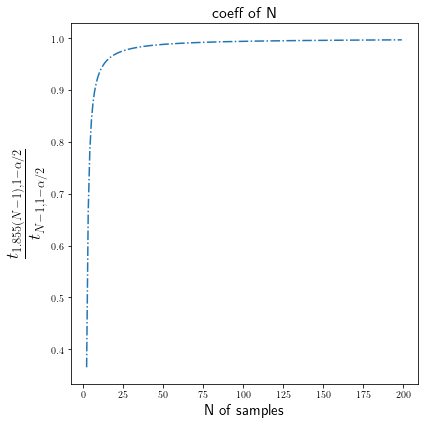

In [38]:
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(6, 6), tight_layout=True)
ax.plot(N, coeff, '-.')

# ax.set_xlabel(r'\textbf{time (s)}')
ax.set_xlabel(r'N of samples', fontsize=15)
ax.set_ylabel(r'$\frac{t_{1.855 (N-1), 1-\alpha/2}}{t_{N - 1, 1 - \alpha/2}}$', fontsize=25)
ax.set_title('coeff of N', fontsize=16)

plt.rcParams['text.usetex'] = False

## Задача 6

### Пункт А. 1 балл: 
#### На зачет

Какая связь между MDE и шириной доверительного интервала в t-test уровня значимости $\alpha$? Точнее, между MDE и `CI length / 2` (шириной дов. интервала пополам).

При каких параметрах ($\alpha,\ \beta$) они будут равны?



Для начала определимся с проверяемой гипотезой:  
$H_0: \mu_0 = 0$  
$H_1: \mu_0 \neq 0$  

При достаточно больших N (N > 60):
- $CI = \left(\overline X \pm \dfrac{z_{1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}} \right)$  
- $\text{MDE} = (z_{1 - \alpha/2} + z_{1 - \beta}) \cdot \sqrt{\dfrac{S^2}{N}}$ 

Из уравнения $CI = MDE$ находим, что $z_{1 - \beta} = 0$, так как нормальное распределение ($\mathcal{N}(0, 1)$) симметрично относительно 0 следует, что $ \beta = 0.5$.
  
Ответ: $ \beta = 0.5, \alpha - любое$

### Пункт B. 2 балла: 

Допустим, вам дан критерий $\Psi$ для провекри гипотезы $H_0: D \overline X = \sigma^2$. Статистика критерия &mdash; $S^2$, а сам критерий является черным ящиком. Можно ли найти такие параметры $\alpha$, $\beta$, чтобы значение MDE равнялась `CI length / 2` уровня значимости $\alpha$? При этом вы не знаете распределения $S^2$?

Какого свойства распределения статистики вам не хватает, чтобы можно было без знания самого распределения приравнять MDE и половину ширины дов. интервала?

## Задача 7 (1 балл)

### Пункт А. 1 балл:

Пусть даны независимые выборки $A, B$ равного размера. То есть у вас есть выборки $A_1, A_2, \dots A_N$ и $B_1, B_2, \dots B_N$, N большое.

Докажите теоретически, что в этом случае вы можете точно также использовать `T'-test`. То есть:

$T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$, 
Где $S^2$ &mdash; статистика S^2 для некоторой выборки



1. Возьмем случайную величину $С_i = A_i - B_i$, которая рапределена по некоторому закону, и все $C_i$ независимы, так как по условию  $A_i$ и $B_i$ независимы. 
2. Тогда, так как выборка большая, по ЦПТ есть сходимость по [распределению](https://en.wikipedia.org/wiki/Convergence_in_distribution): $\overline С = \overline A - \overline B \stackrel{d}{\rightarrow} \mathcal{N}(\mu_с, \frac{\sqrt{\sigma_с^2}}{N})$
3. Так же по ЦПТ: $\;$ $\overline A \stackrel{d}{\rightarrow} \mathcal{N}(\mu_a, \frac{\sqrt{\sigma_a^2}}{N})$ и $\overline B \stackrel{d}{\rightarrow} \mathcal{N}(\mu_b, \frac{\sqrt{\sigma_b^2}}{N})$ $\Rightarrow$ по свойствам нормального распределения $\overline A - \overline B \stackrel{d}{\rightarrow} \mathcal{N}(\mu_a - \mu_b, \frac{\sqrt{\sigma_a^2}}{N} + \frac{\sqrt{\sigma_b^2}}{N})$  
   

4. То есть $\mu_c = \mu_a - \mu_b$ и $\sigma_с^2 = \sigma_a^2 + \sigma_b^2$
5. Следовательно $\xi := \sqrt{N}\dfrac{\overline С - \mu_c}{\sqrt{\sigma_c^2}}  = \sqrt{N}\dfrac{\overline A - \overline B - (\mu_a - \mu_b)}{\sqrt{\sigma_c^2}} \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$. Пока небходимо знать дисперсию с.в. $С_i = A_i - B_i$.

6. Тогда $T = \sqrt{n}\dfrac{\overline C - \mu_c}{\sqrt{S^2}} = \xi \cdot \sqrt{\dfrac{\sigma_c^2}{S^2}}$. Обозначим $\phi := \sqrt{\dfrac{\sigma_c^2}{S^2}}$
    - $S^2 = \dfrac{1}{N - 1}\underset{i=1}{\overset{N}{\sum}}(C_i - \overline C)^2 = \dfrac{1}{N - 1}\underset{i=1}{\overset{N}{\sum}}((A_i - B_i) - (\overline A - \overline B))^2$ - [состоятельная оценка](https://ru.wikipedia.org/wiki/Состоятельная_оценка) $\sigma_c^2$. По другому это можно записать так: $S^2$ [сходится по вероятности](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_probability) к $\sigma_c^2$. То есть $S^2  \stackrel{p}{\rightarrow} \sigma_c^2$
    - А в этом случае существует [теорема](https://en.wikipedia.org/wiki/Continuous_mapping_theorem), утверждающая, что $\phi = \dfrac{\sigma_c^2}{S^2}  \stackrel{p}{\rightarrow} 1$.
7. $T = \xi \cdot \phi$.
    - $\xi \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$
    - $\phi  \stackrel{p}{\rightarrow} 1$
    - И тут вступает в силу еще одна [теорема Слуцкого](https://en.wikipedia.org/wiki/Slutsky%27s_theorem): $T = \xi \cdot \phi \stackrel{d}{\rightarrow} 1\cdot \mathcal{N}(0, 1)$. Та же сходимость, что и в ЦПТ!

Итого $T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$, где $S^2$ - статистика $S^2$ для выборки $A_1 - B_1, A_2 - B_2, \dots A_N - B_N$.
 

### Пункт B* 2 балла:

Докажите что в этом случае

- $T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$

Аналогично, как и для 7.1 пункты с 1 - 5.  

6. Тогда $T = \sqrt{N}\dfrac{\overline C - \mu_c}{\sqrt{S^2}} = \xi \cdot \sqrt{\dfrac{\sigma_c^2}{S^2}}$. Обозначим $\phi := \sqrt{\dfrac{\sigma_c^2}{S^2}}$
    - Теперь воспользуемся [теоремой Слуцкого](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%A1%D0%BB%D1%83%D1%86%D0%BA%D0%BE%D0%B3%D0%BE) которая в нашем случае говорит о том, что если $\sigma_c^2 = \sigma_a^2 + \sigma_b^2$, а $S_a$, $S_b$ сходтся по вероятностям к $\sigma_a^2$, $\sigma_b^2$ соответственно. То есть $S_a^2 \stackrel{p}{\rightarrow} \sigma_a^2$ и $S_b^2  \stackrel{p}{\rightarrow} \sigma_b^2$. То и $S^2 = S_c^2 \stackrel{p}{\rightarrow} S_a^2 + S_b^2$.
    - Снова по [теореме](https://en.wikipedia.org/wiki/Continuous_mapping_theorem) $\phi = \dfrac{\sigma_с^2}{S_a^2 + S_b^2}  \stackrel{p}{\rightarrow}1$.
7. Аналогично пункту 7 из 7.1, только принимая, что $\phi = \dfrac{\sigma_с^2}{S_a^2 + S_b^2}  \stackrel{p}{\rightarrow}1$.

Итого $T(A, B) = \sqrt{N}\dfrac{\overline A - \overline B}{\sqrt{S^2_{A} + S^2_{B}}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$

## Задача 8* (3 балла)

На занятии мы увидели, почему большой размер выборки помогает точнее получить оценку для матожидания случайной величины. Используя аппарат математической статистики, покажите, какому товару стоит доверять больше. Возможно, вам придётся использовать допущения, но такова жизнь.

Согласны ли вы с автором поста? Есть ли дополнительные (не связанные с математикой) причины доверять правому товару больше чем левому?

![](https://i.ibb.co/HHWfF8s/change.jpg)

Пусть наши оценка, которую ставят пользователи подчиняется нормальному закону. Пусть также у двух товаров пользователи из одного семейства распределения,а на левой картинке, допустим, прошло мало времени, поэтому мало оценок. Найдем среднюю оценки пользователей по данной выборке, оно подчиняется распределению Стьюдента $t_{N-1}$. Распределения Стьюдента двух групп с допущениями, описанными выше, отличаются количеством оценок (N). А распределение Стьюдента с меньшим количеством степеней свободы имеет более тяжелые хвосты, по сравнению с тем, у которого N больше. А это означает, что вероятность отклониться от истинного матожидания у распределения с большим N меньше, поэтому мы доверяем больше второму товару.